In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr

In [4]:
sshData = xr.open_dataset('curtain_SSH_SVB_febTS.nc')
sshData_noSVB = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')

Text(0.5, 1.0, 'SVB run')

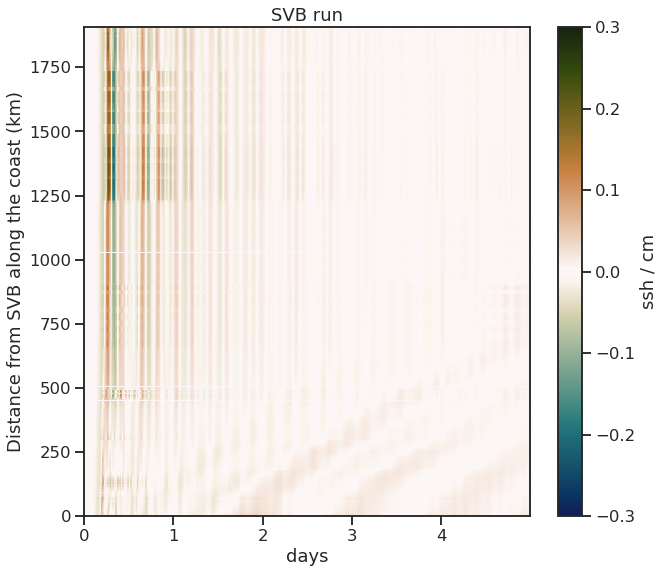

In [25]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(sshData.T/(24*3600), 
                   sshData.X,
                   np.transpose((sshData.curtain_data.data-
                                 sshData_noSVB.curtain_data.data)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('SVB run')

In [6]:
sshData

<xarray.Dataset>
Dimensions:       (t: 720, x: 555)
Dimensions without coordinates: t, x
Data variables:
    X             (x) float64 0.0 1.512 3.025 ... 1.903e+03 1.905e+03 1.907e+03
    T             (t) float64 0.0 600.0 1.2e+03 ... 4.308e+05 4.314e+05
    curtain_data  (t, x) float64 2.162e-06 1.747e-06 ... -0.0001706 -0.0002359
Attributes:
    title:        SSH curtain plot data febTS SVB
    author:       Karina Ramos Musalem
    institution:  ICACC-UNAM
    source:       /notebooks/MITgcm/domain5/ssh_hovmoller_at_coast_all_points...
    description:  SSH data at points along the coast to build curtain hovmöll...
    timeStamp:    Fri Oct 15 10:19:14 2021

In [7]:
sshData.curtain_data.data

array([[ 2.16197659e-06,  1.74720180e-06,  1.44910093e-06, ...,
         1.05948840e-06,  6.26527251e-07,  1.63984589e-06],
       [ 1.08771349e-05,  8.24950580e-06,  6.27426709e-06, ...,
         1.78935556e-06,  2.25184908e-06,  8.41513507e-06],
       [ 1.88285240e-05,  1.53494160e-05,  1.27356110e-05, ...,
         5.44023276e-06,  5.86550989e-06,  1.91754467e-05],
       ...,
       [ 1.95374883e-05,  1.73016301e-05, -9.91538813e-06, ...,
        -1.95096109e-04, -2.01773999e-04, -2.78402711e-04],
       [ 2.15325248e-05,  1.93156526e-05, -8.06702411e-06, ...,
        -1.77913696e-04, -1.83218456e-04, -2.44785831e-04],
       [ 2.11434575e-05,  1.89006574e-05, -8.61766984e-06, ...,
        -1.64047514e-04, -1.70564496e-04, -2.35905651e-04]])

In [16]:
sshData_aug = xr.open_dataset('curtain_SSH_SVB_AugTS.nc')
sshData_aug_noSVB = xr.open_dataset('curtain_SSH_NoSVB_AugTS.nc')

Text(0.5, 1.0, 'SVB-NoSVB febTS / SVB-NoSVB augTS ')

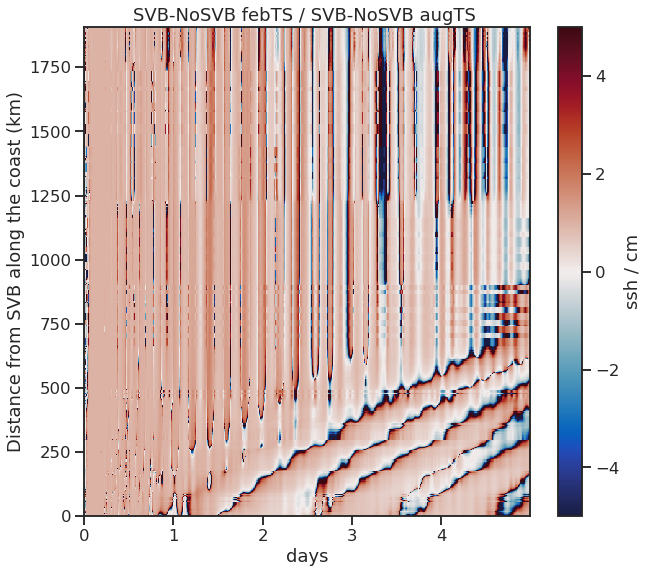

In [20]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(sshData.T/(24*3600), 
                   sshData.X,
                   np.transpose((sshData.curtain_data.data-sshData_noSVB.curtain_data.data)*100)/
                   np.transpose((sshData_aug.curtain_data.data-sshData_aug_noSVB.curtain_data.data)*100),
                   vmin=-5, vmax=5, cmap=cmo.cm.balance)
cb = plt.colorbar(pc,label='ssh / cm')

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('SVB-NoSVB febTS / SVB-NoSVB augTS ')

(0.0, 1.0)

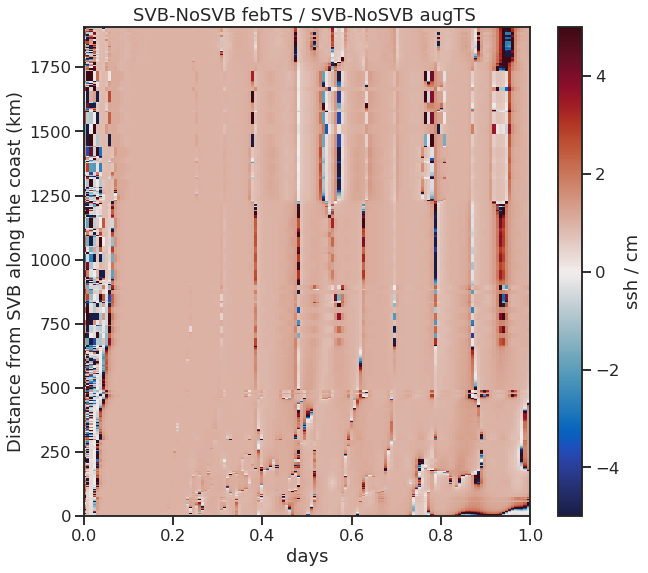

In [22]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(sshData.T/(24*3600), 
                   sshData.X,
                   np.transpose((sshData.curtain_data.data-sshData_noSVB.curtain_data.data)*100)/
                   np.transpose((sshData_aug.curtain_data.data-sshData_aug_noSVB.curtain_data.data)*100),
                   vmin=-5, vmax=5, cmap=cmo.cm.balance)
cb = plt.colorbar(pc,label='ssh / cm')

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('SVB-NoSVB febTS / SVB-NoSVB augTS ')
ax.set_xlim(0,1)